In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls ./content/gdrive


Mounted at /content/gdrive
ls: cannot access './content/gdrive': No such file or directory


In [ ]:
!unzip /content/gdrive/MyDrive/my_new_mri-images.zip


Streaming output truncated to the last 5000 lines.
  inflating: my_new_mri-images/meningioma/Tr-me_0108.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0109.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0110.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0111.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0112.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0113.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0114.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0115.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0116.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0117.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0118.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0119.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0120.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0121.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0122.jpg  
  inflating: my_new_mri-images/meningioma/Tr-me_0123.jpg  
  inf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


In [ ]:
import os
import math
import shutil



In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=50
CHANNELS=3

In [ ]:
origin_dir="/content/my_new_mri-images"
number_of_imgs={}

In [ ]:
for dir in os.listdir(origin_dir):
  number_of_imgs[dir]=len(os.listdir(os.path.join(origin_dir,dir)))

In [ ]:

number_of_imgs.items()

dict_items([('meningioma', 1645), ('pituitary', 1757), ('notumor', 2000), ('glioma', 1621)])

In [ ]:

"""def partion(l,amount):
  if not os.path.exists("./"+l):
    os.mkdir("./"+l)

    for dir in os.listdir(os.path.join(origin_dir)):
      os.makedirs("./"+l+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(origin_dir,dir)),
                                  size=math.floor(amount*number_of_imgs[dir]-5),
                                  replace=False ):
        o=os.path.join(origin_dir,dir,img)
        p=os.path.join("./"+l,dir)
        shutil.copy(o,p)
        os.remove(o)
  else :
    print(f"{l} folder exists")"""
  
  





'def partion(l,amount):\n  if not os.path.exists("./"+l):\n    os.mkdir("./"+l)\n\n    for dir in os.listdir(os.path.join(origin_dir)):\n      os.makedirs("./"+l+"/"+dir)\n      for img in np.random.choice(a=os.listdir(os.path.join(origin_dir,dir)),\n                                  size=math.floor(amount*number_of_imgs[dir]-5),\n                                  replace=False ):\n        o=os.path.join(origin_dir,dir,img)\n        p=os.path.join("./"+l,dir)\n        shutil.copy(o,p)\n        os.remove(o)\n  else :\n    print(f"{l} folder exists")'

In [ ]:
"""partion("test_ds",0.1)
partion("val_ds",0.1)
partion("train_ds",0.8)"""

'partion("test_ds",0.1)\npartion("val_ds",0.1)\npartion("train_ds",0.8)'

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/my_new_mri-images", shuffle=True, 
image_size=(IMAGE_SIZE,IMAGE_SIZE), label_mode = 'int',
batch_size=BATCH_SIZE
)

Found 7023 files belonging to 4 classes.


In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
import pandas as pd
print(np.__version__)
print(pd.__version__)


1.21.5
1.3.5


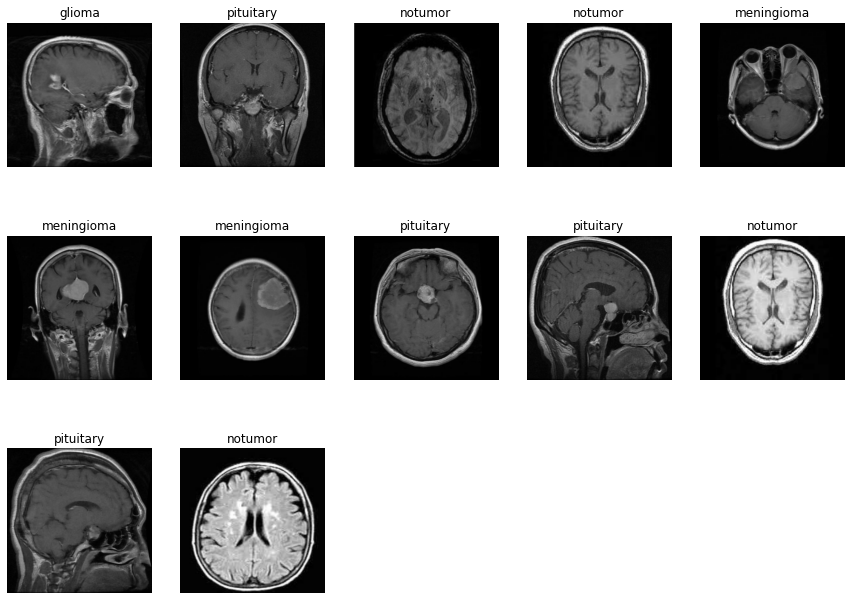

In [ ]:
clas=dataset.class_names
clas
plt.figure(figsize=(15,15))
len(dataset)
for image_batch,label in dataset.take(1):
   for i in range(12):
     plt.subplot(4,5,i+1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(clas[label[i]])
     plt.axis("off")
        


In [ ]:
def ds_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1, shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
    
        ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split * ds_size)
    train_ds=ds.take(train_size)
    test_ds=ds.skip(train_size)
    val_size=int(val_split * ds_size)
    val_ds=test_ds.take(val_size)
    test_ds=test_ds.skip(val_size)
    
    
    return train_ds,test_ds,val_ds

In [ ]:
train_ds,test_ds,val_ds=ds_partitions_tf(dataset)

In [ ]:
len(train_ds)

176

In [ ]:
len(test_ds)

22

In [ ]:
len(val_ds)

22

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
resize=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE)
   
])

In [ ]:
resize=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE)
   
])

In [ ]:
data_augementation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
      
])

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.models import Sequential
input_shape=(32,256,256,3)
n_classes=4
model=tf.keras.Sequential([
    data_augementation,
    resize,
    tf.keras.layers.experimental.preprocessing.Rescaling(
    scale=1.0/255, offset=0.0
),
    
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
  
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),

    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),

    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
   
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])   
model.build(input_shape=input_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 rescaling (Rescaling)       (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                      

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

In [ ]:
train_ds
for x,y in train_ds:
    print(y)

tf.Tensor([3 3 2 3 0 1 2 1 1 3 3 3 2 0 2 3 2 0 2 1 3 0 0 1 2 1 1 0 1 2 0 1], shape=(32,), dtype=int32)
tf.Tensor([2 1 1 0 0 2 2 1 0 2 1 1 0 2 1 2 3 2 3 0 2 2 0 2 3 2 3 2 2 3 2 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 3 3 0 3 0 2 3 0 2 2 1 3 2 0 0 3 1 1 2 1 1 2 1 3 0 3 1 2 1 0], shape=(32,), dtype=int32)
tf.Tensor([3 0 2 0 2 2 2 0 2 3 0 0 1 2 1 0 2 2 0 1 1 2 2 2 2 1 1 3 3 1 2 1], shape=(32,), dtype=int32)
tf.Tensor([2 3 0 0 2 2 3 2 0 3 2 0 2 3 3 3 2 3 1 1 1 1 2 2 0 0 1 2 1 1 0 1], shape=(32,), dtype=int32)
tf.Tensor([3 0 1 0 1 3 1 3 2 2 2 2 2 3 0 2 2 3 1 2 0 2 2 3 1 2 2 3 2 3 0 0], shape=(32,), dtype=int32)
tf.Tensor([2 3 1 2 0 1 0 3 1 1 0 1 2 3 3 2 2 3 1 3 1 2 2 3 2 2 2 1 3 3 2 2], shape=(32,), dtype=int32)
tf.Tensor([2 0 1 1 2 1 1 2 0 3 1 2 2 1 0 1 3 0 3 0 1 2 2 1 1 0 0 1 0 0 0 2], shape=(32,), dtype=int32)
tf.Tensor([2 2 3 1 2 0 2 2 0 0 2 0 3 2 1 2 0 3 1 3 0 2 1 2 2 1 3 1 0 1 3 1], shape=(32,), dtype=int32)
tf.Tensor([1 3 3 3 0 1 0 3 1 1 2 1 1 0 2 1 0 0 2 1 0 2 2 2 1 2 2 2 1 1 3 

In [ ]:
val_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
history= model.fit(
    train_ds,
    verbose=1,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/50
176/176 [==============================] - 47s 199ms/step - loss: 1.0618 - sparse_categorical_accuracy: 0.5158 - val_loss: 0.8375 - val_sparse_categorical_accuracy: 0.6449
Epoch 2/50
176/176 [==============================] - 24s 135ms/step - loss: 0.7100 - sparse_categorical_accuracy: 0.7163 - val_loss: 0.6762 - val_sparse_categorical_accuracy: 0.7287
Epoch 3/50
176/176 [==============================] - 24s 134ms/step - loss: 0.5894 - sparse_categorical_accuracy: 0.7763 - val_loss: 0.5093 - val_sparse_categorical_accuracy: 0.7940
Epoch 4/50
176/176 [==============================] - 24s 134ms/step - loss: 0.5199 - sparse_categorical_accuracy: 0.7947 - val_loss: 0.6278 - val_sparse_categorical_accuracy: 0.7429
Epoch 5/50
176/176 [==============================] - 24s 134ms/step - loss: 0.4764 - sparse_categorical_accuracy: 0.8134 - val_loss: 0.5736 - val_sparse_categorical_accuracy: 0.7955
Epoch 6/50
176/176 [==============================] - 24s 135ms/step - loss: 0.4222 -

In [ ]:
scores= model.evaluate(test_ds)
scores


22/22 [==============================] - 13s 71ms/step - loss: 0.0766 - sparse_categorical_accuracy: 0.9738


[0.07660417258739471, 0.9737991094589233]

In [ ]:
history.params
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss= history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training accuracy and validation accuracy')

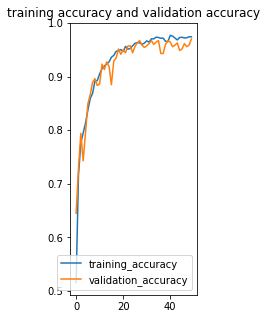

In [ ]:

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="training_accuracy")
plt.plot(range(EPOCHS),val_acc , label="validation_accuracy")
plt.legend(loc='lower right')
plt.title("training accuracy and validation accuracy")


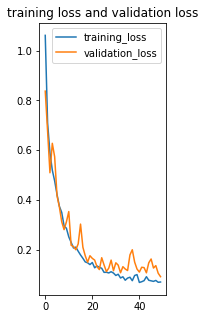

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="training_loss")
plt.plot(range(EPOCHS),val_loss , label="validation_loss")
plt.legend(loc='upper right')
plt.title("training loss and validation loss")
plt.show()

first image to be predicted
actual label: glioma
predicted label: glioma


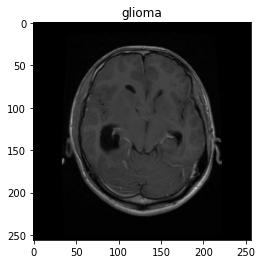

In [ ]:
for image_batch,label in test_ds.take(1):
  first_image=image_batch[0].numpy().astype('uint8')
  first_label=clas[label[0].numpy()]
  print("first image to be predicted")
  print("actual label:",first_label)
  plt.imshow(first_image)
  plt.title(first_label)
  model_prediction=model.predict(image_batch)
  print("predicted label:",clas[np.argmax(model_prediction[0])])

In [ ]:
def predict(model,img):
  image_as_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  image_as_array=tf.expand_dims(image_as_array,0)
  model_prediction=model.predict(image_as_array)
  predicted_class=clas[np.argmax(model_prediction[0])]
  confidence=round(100* (np.max(model_prediction[0])),2)
  return predicted_class,confidence

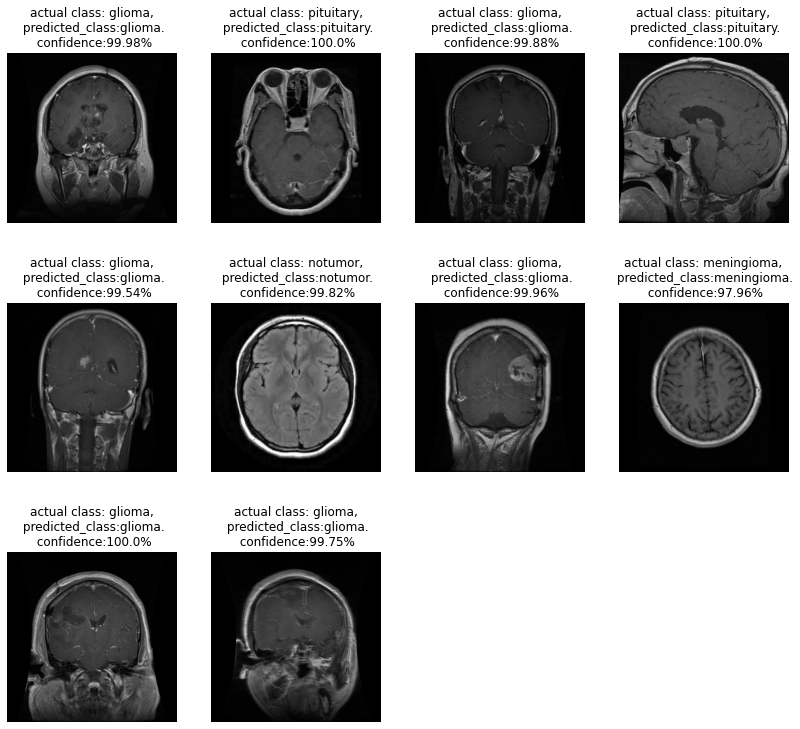

In [ ]:
plt.figure(figsize=(14,13))
for images,labels in test_ds.take(1):
  for i in range(10):
    
    ax=plt.subplot(3,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_label=clas[labels[i]]
    plt.axis("off")
    plt.title(f"actual class: {actual_label},\n predicted_class:{predicted_class}.\n confidence:{confidence}%")





In [ ]:

model.save('mymodel.h5')
